In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams.update({                      # setup matplotlib to use latex for output
    "pgf.texsystem": "pdflatex",        # change this if using xetex or lautex
    "text.usetex": True,                # use LaTeX to write all text
    "font.family": "serif",
    "font.serif": [],                   # blank entries should cause plots to inherit fonts from the document
    "font.sans-serif": [],
    "font.monospace": [],
    "axes.labelsize": 10,               # LaTeX default is 10pt font.
    "font.size": 10,
    "legend.fontsize": 8,               # Make the legend/label fonts a little smaller
    "xtick.labelsize": 8,
    "ytick.labelsize": 8,
    "pgf.preamble": [
        r"\usepackage[utf8x]{inputenc}",    # use utf8 fonts becasue your computer can handle it :)
        r"\usepackage[T1]{fontenc}",        # plots will be generated using this preamble
        ]
    })

--------------------------------

# Results


### PINN: 

Network: [2, 20, 20, 20, 20, 20, 20, 20, 20, 1]

Num Param: 3.02k

Error u: 1.686902e-03

Error l1: 0.05701%

Error l2: 0.63558%

Error lambda_1 (Noisy): 0.170380%

Error lambda_2 (Noisy): 0.030970%

### QRes-PINN: 
Network: [2, 10, 10, 10, 10, 10, 10, 10, 10, 1]

Num Param: 1.54k

Error u: 8.430614e-04

Error l1: 0.02735%

Error l2: 0.37892%

Error lambda_1 (Noisy): 0.171936%

Error lambda_2 (Noisy): 0.002450%

## Count Number of Parameters

In [5]:
l = [2, 20, 20, 20, 20, 20, 20, 20, 20, 1]
num_param = 0
for i in range(len(l)-1):
    num_param += l[i] * l[i+1] + l[i+1]
print("PINN Num params: %.2fk" % np.round(num_param / 1000, 2))

PINN Num params: 3.02k


In [6]:
l = [2, 10, 10, 10, 10, 10, 10, 10, 10, 1]
num_param = 0
for i in range(len(l)-1):
    num_param += l[i] * l[i+1] * 2 + l[i+1]
print("QRes Num params: %.2fk" % np.round(num_param / 1000, 2))

QRes Num params: 1.54k



--------------------------------

# Training Loss


In [7]:
pinn_clean = np.load("loss/loss_clean_PINNs.npy")
qres_clean = np.load("loss/loss_clean_QRes.npy")
pinn_noisy = np.load("loss/loss_noisy_PINNs.npy")
qres_noisy = np.load("loss/loss_noisy_QRes.npy")

### Clean Data

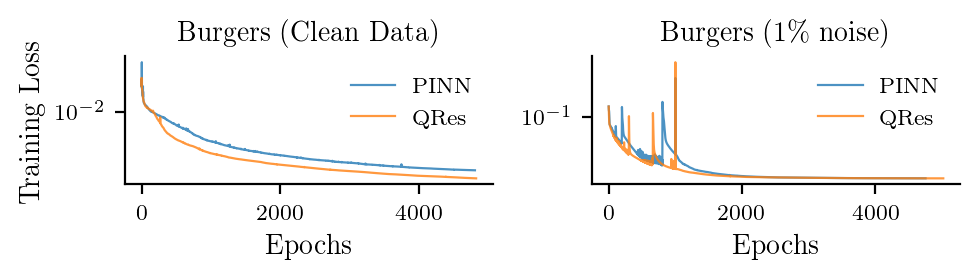

In [10]:
fig, axes = plt.subplots(1, 2, dpi=200, figsize=(5, 1.5))

ax = axes[0]
sns.lineplot(data=pinn_clean, label='PINN', alpha=0.8, ax=ax, lw=0.8)
sns.lineplot(data=qres_clean, label='QRes', alpha=0.8, ax=ax, lw=0.8)
ax.set_xlabel('Epochs', fontsize=10)
ax.set_ylabel('Training Loss', fontsize=10)
ax.set_title('Burgers (Clean Data)', fontsize=10)
ax.set_yscale('log')
l = ax.get_legend()
l.set_title('')
l.get_frame().set_linewidth(0.0)

ax = axes[1]
sns.lineplot(data=pinn_noisy, label='PINN', alpha=0.8, ax=ax, lw=0.8)
sns.lineplot(data=qres_noisy, label='QRes', alpha=0.8, ax=ax, lw=0.8)
ax.set_xlabel('Epochs')
ax.set_title('Burgers (1\% noise)', fontsize=10)
ax.set_yscale('log')
l = ax.get_legend()
l.set_title('')
l.get_frame().set_linewidth(0.0)

sns.despine(offset=0)
fig.tight_layout()
fig.savefig("figures/loss_burgers_identification_clean.pdf", dpi=300)
plt.show()